[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drdave-teaching/OPIM5509Files/blob/main/OPIM5509_Module2_Files/A_First_NN_Model_Regression.ipynb)

# A First Neural Network (Regression)
**Dr. Dave Wanik - University of Connecticut**

Data description: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

In [ ]:
# get some important modules
import pandas as pd # for data wrangling
import numpy as np # for array calculations, some math functions
from matplotlib import pyplot as plt #for plotting

In [ ]:
# some modules for neural nets
from keras.models import Sequential
from keras.layers import Dense

# Read and prepare data
Read data, split data, minmax normalization

In [ ]:
# # mount your drive
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# # read in some data
# df = pd.read_csv("/content/drive/My Drive/OPIM 5509/Module 2: Dense Neural Networks/Data/BostonHousing.csv")

In [ ]:
# Link to the data file on Github
url = "https://raw.githubusercontent.com/drdave-teaching/OPIM5509Files/refs/heads/main/OPIM5509_Module2_Files/BostonHousing.csv"

# retrieve the CSV data and build a dataframe
df = pd.read_csv(url)

df.shape

(506, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


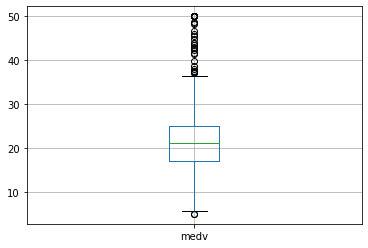

In [ ]:
# do some EDA if you'd like
# see the other Boston Housing EDA script
# boxplots, scatterplots, kde plots
df.boxplot('medv')

In [ ]:
# shape
df.shape

(506, 14)

In [ ]:
# column names
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [ ]:
# column types
df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

## Split data into X and y
Let's fit a NN with a simple 80/20 split

In [ ]:
# split our data into X and y
y = df['medv']
# we can use .iloc to select rows columns by index
# this means all rows
X = df.iloc[:,0:13]

In [ ]:
print(X.shape, y.shape)

(506, 13) (506,)


In [ ]:
# min/max normalization
from sklearn import preprocessing

X = X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(X_scaled)

In [ ]:
# verify all data is between 0 and 1 (min max scaling)
X.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.040544,0.113636,0.391378,0.069170,0.349167,0.521869,0.676364,0.242381,0.371713,0.422208,0.622929,0.898568,0.301409
std,0.096679,0.233225,0.251479,0.253994,0.238431,0.134627,0.289896,0.191482,0.378576,0.321636,0.230313,0.230205,0.197049
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000851,0.000000,0.173387,0.000000,0.131687,0.445392,0.433831,0.088259,0.130435,0.175573,0.510638,0.945730,0.144040
50%,0.002812,0.000000,0.338343,0.000000,0.314815,0.507281,0.768280,0.188949,0.173913,0.272901,0.686170,0.986232,0.265728
75%,0.041258,0.125000,0.646628,0.000000,0.491770,0.586798,0.938980,0.369088,1.000000,0.914122,0.808511,0.998298,0.420116
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# basic data splitting
from sklearn.model_selection import train_test_split

# basic data holdout
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# check out the shape of everything
print("This is the train shape:" + str(X_train.shape))
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(df.shape)

This is the train shape:(404, 13)
(102, 13)
(404,)
(102,)
(506, 14)


# Fit, compile and run the model!
We will use the Sequential API to add layers to the NN, then compile (just specifying an optimizer and a loss to track model fitting), and the actually fit the model. We save to a variable called 'history' so that we can make interesting learning curves later on.

In [ ]:
X_train.shape[1]

13

In [ ]:
# this simply sets up the model
model = Sequential()
# this is hidden layer 1
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],))) # input shape is = (features,)
# this is hidden layer 2                                                  # features = the number of columns
model.add(Dense(64, activation='relu'))
# this is the output node
model.add(Dense(1, activation='linear')) # the activation function here is 'linear' by default
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                896       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#  this compiles the model, specifies model evaluation metrics
# but doesn't run the model yet
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [ ]:
# now run the model!
# let's store this as "history"
history = model.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          epochs=300, # you get to choose this!
          batch_size=10, # you get to choose this!
          verbose=1) # 0 = dont show verbose, 1 = show it!

# note - this runs for 300 epochs using batch gradient descent
# because we told it to!


Epoch 1/300
41/41 [==============================] - 1s 5ms/step - loss: 519.4517 - mae: 20.6967 - val_loss: 390.2507 - val_mae: 17.4010
Epoch 2/300
41/41 [==============================] - 0s 2ms/step - loss: 293.5069 - mae: 14.1221 - val_loss: 160.7701 - val_mae: 9.8629
Epoch 3/300
41/41 [==============================] - 0s 2ms/step - loss: 149.1158 - mae: 9.4446 - val_loss: 101.7790 - val_mae: 7.3310
Epoch 4/300
41/41 [==============================] - 0s 2ms/step - loss: 104.8408 - mae: 7.8542 - val_loss: 81.9941 - val_mae: 6.6682
Epoch 5/300
41/41 [==============================] - 0s 2ms/step - loss: 78.4321 - mae: 6.5747 - val_loss: 68.1773 - val_mae: 5.8354
Epoch 6/300
41/41 [==============================] - 0s 2ms/step - loss: 59.9574 - mae: 5.6599 - val_loss: 64.2964 - val_mae: 5.3112
Epoch 7/300
41/41 [==============================] - 0s 2ms/step - loss: 49.2602 - mae: 4.9816 - val_loss: 61.1186 - val_mae: 5.4311
Epoch 8/300
41/41 [==============================] - 0s 2ms

In [ ]:
"""
 Note that the call to model.fit() returns a History object.
 This object has a member history, which is a dictionary containing data
 about everything that happened
during training. Let’s look at it:

>>> history_dict = history.history
>>> history_dict.keys()
"""

history_dict = history.history
history_dict.keys()

# out of all of these, let's plot the val_mean_absolute_error

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

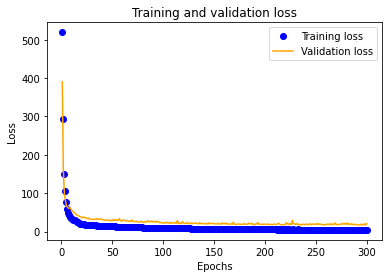

In [ ]:
# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# we can look for the min value in the validation
# and that's how we update our model and re-rerun
# in our case, it looks like this happens around 100 epochs
resultDF = pd.DataFrame(history_dict)
resultDF.head()

,loss,mae,val_loss,val_mae
0,519.451721,20.696722,390.250732,17.400969
1,293.506927,14.122101,160.770111,9.862941
2,149.115768,9.444584,101.778954,7.331017
3,104.840782,7.854214,81.994057,6.668207
4,78.432144,6.574712,68.177307,5.835396


In [ ]:
# show the row where you have a min value
resultDF.loc[resultDF['val_loss'] == min(resultDF['val_loss'])]
# so later on, we will re-run for what this min would be epochs
# if you set a random seed, you'd get the same answers.

,loss,mae,val_loss,val_mae
292,4.859601,1.647561,17.133862,2.780753


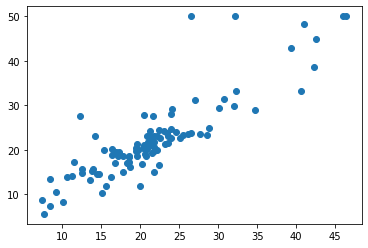

In [ ]:
# we can show how our model fit - notice that it runs
# for all 300 epochs - it didn't stop even if we
# started getting overfit results
myPreds = model.predict(X_test)
myActual = y_test

# import matplotlib
plt.scatter(myPreds, myActual)
plt.show()

In [ ]:
# we can get the results from our model
results = model.evaluate(X_test, y_test)
results # this shows the loss (raw value), and your metric (MAE)

4/4 [==============================] - 0s 2ms/step - loss: 20.3658 - mae: 2.8760


[20.365795135498047, 2.8759751319885254]

In [ ]:
# you can also calculate it from your results
# left as an exercise from the students (MAE, RMSE, MAPE if not too many zeros)
# link: https://www.dataquest.io/blog/understanding-regression-error-metrics/

print(type(myPreds)) # numpy.ndarray
print(type(myActual)) # pandas Series

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [ ]:
# flatten the 1-D numpy array
myPreds = np.ndarray.flatten(myPreds)
myPreds

array([23.934092 , 26.473007 , 21.711153 , 10.039035 , 19.597343 ,
       19.743198 , 21.820076 , 20.762203 , 18.739382 , 17.10317  ,
        7.397355 , 11.510809 , 12.57233  ,  9.224446 , 46.457024 ,
       34.77113  , 22.203724 , 40.623535 , 30.13336  , 21.417143 ,
       23.455904 , 20.632761 , 19.43263  , 24.101484 , 21.495615 ,
       20.855951 , 17.26749  , 16.859856 , 42.30494  , 18.498135 ,
       14.393966 , 15.285632 , 20.347845 , 20.91661  , 26.187166 ,
       20.23704  ,  7.700075 , 32.180862 , 14.756985 , 13.549214 ,
       24.569971 , 22.1098   , 21.758514 , 16.23087  , 22.46561  ,
       23.514742 , 20.586912 , 16.779081 , 15.569469 , 21.693682 ,
       13.887376 , 21.081635 , 23.031252 , 39.30255  , 12.51598  ,
       21.80686  , 18.314428 , 18.499172 , 17.777538 , 20.954275 ,
       19.570663 , 20.510675 , 32.24855  , 30.777775 , 16.437735 ,
       32.06555  , 13.854895 , 21.80088  , 12.217311 , 22.529516 ,
       19.60388  , 21.427244 , 27.695274 , 27.015297 , 26.4599

In [ ]:
# we can put the predictions side by side
# need to drop the index
myPreds = pd.DataFrame(myPreds)
myPreds.reset_index(drop=True)
myPreds.rename(columns={0: "MyPreds"}, inplace=True)
myPreds.dtypes
myPreds.head()

,MyPreds
0,23.934092
1,26.473007
2,21.711153
3,10.039035
4,19.597343


In [ ]:
# your actual predictions
# note, I put these in a numpy array
# since the index was being annoying
myActual = pd.DataFrame(np.array(y_test))
myActual.reset_index(drop=True)
myActual.rename(columns={0: "MyActual"}, inplace=True)
myActual.dtypes
myActual.head()

,MyActual
0,22.6
1,50.0
2,23.0
3,8.3
4,21.2


In [ ]:
allResults = pd.concat([myPreds, myActual], axis=1)
allResults.head()

,MyPreds,MyActual
0,23.934092,22.6
1,26.473007,50.0
2,21.711153,23.0
3,10.039035,8.3
4,19.597343,21.2


In [ ]:
# you can then calculate all sorts of metrics
# on this dataframe
allResults['AbsErr'] = abs(allResults['MyPreds'] - allResults['MyActual'])
allResults.head()
# now it's easy to calculate MAE
print(np.mean(allResults['AbsErr']))

# which is the same as:
model.evaluate(X_test, y_test)

# think of all the other regression metrics you can make!

# I much prefer to have control of my results
# like this! You can imagine how nice it is
# to extract TPR, TFR and other things for a
# classification problem

# and you can also imagine how nice it is
# for a k-fold cross-validation!
# just need to add fold information

2.8759748552359783
4/4 [==============================] - 0s 3ms/step - loss: 20.3658 - mae: 2.8760


[20.365795135498047, 2.8759751319885254]

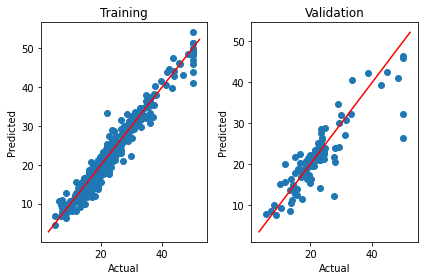

In [ ]:
# nice link: https://matplotlib.org/gallery/subplots_axes_and_figures/figure_title.html

# specify the dimensions
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# add a main title across top
#fig.suptitle("My Results", fontsize=20)

# 	val_loss	val_mean_absolute_error	loss	mean_absolute_error

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=model.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test, y=model.predict(X_test)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# by adding this line of code, we can save our plot to our Google Drive
# link: https://chartio.com/resources/tutorials/how-to-save-a-plot-to-a-file-using-matplotlib/
# plt.savefig('/content/drive/My Drive/OPIM 5509/Module 2: Dense Neural Networks/Week 5: Regression/Results Plot.png')

# show the plot
plt.show()

## Re-run the model for X epochs
X epochs since this is the best fit of the model. X will vary student to student do to randomized weights at the beginning.

In [ ]:
# let's try to re-run the model for X epochs
# then we can save the results

## Introducing Early-Stopping
It would be nice if our model would stop once it starts overfitting.

Here's a nice link: https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/

In [ ]:
# don't forget you can also include patience
# simple early stopping
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min',
                   # LOOK HOW QUICK IT STOPS IF YOU DON'T USE
                   # PATIENCE - SUBJECT TO NOISE!!!
                   # will vary based on every problem you tackle
                   # try a patience of 2, 5, 10, 50, 100...
                   # what do you notice?
                   patience=10,
                   verbose=1,
                   restore_best_weights=True) # don't forget this!
# fit model
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=4000,
                    batch_size = 10,
                    verbose=1,
                    callbacks=[es]) #notice we won't have to manually watch it
                    #

Epoch 1/4000
41/41 [==============================] - 0s 3ms/step - loss: 4.8947 - mae: 1.6214 - val_loss: 18.1441 - val_mae: 2.7795
Epoch 2/4000
41/41 [==============================] - 0s 2ms/step - loss: 4.5678 - mae: 1.6187 - val_loss: 21.1251 - val_mae: 3.0149
Epoch 3/4000
41/41 [==============================] - 0s 2ms/step - loss: 4.8244 - mae: 1.5903 - val_loss: 19.4762 - val_mae: 2.8216
Epoch 4/4000
41/41 [==============================] - 0s 2ms/step - loss: 4.4930 - mae: 1.5883 - val_loss: 18.1586 - val_mae: 2.7931
Epoch 5/4000
41/41 [==============================] - 0s 2ms/step - loss: 4.7946 - mae: 1.6553 - val_loss: 18.4185 - val_mae: 2.8752
Epoch 6/4000
41/41 [==============================] - 0s 2ms/step - loss: 4.5754 - mae: 1.6047 - val_loss: 17.7224 - val_mae: 2.8794
Epoch 7/4000
41/41 [==============================] - 0s 2ms/step - loss: 4.3865 - mae: 1.5882 - val_loss: 24.5186 - val_mae: 3.1506
Epoch 8/4000
41/41 [==============================] - 0s 3ms/step - l

In [ ]:
# later, we should try to save the model (checkpointing)
# and we could try loading it at a later time...
# maybe save this for Week 2

You can grab all that plotting code from before if you want.

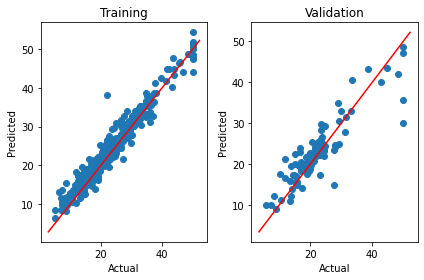

In [ ]:
# scatterplot of actual vs. pred
# specify the dimensions
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=model.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test, y=model.predict(X_test)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# by adding this line of code, we can save our plot to our Google Drive
# link: https://chartio.com/resources/tutorials/how-to-save-a-plot-to-a-file-using-matplotlib/
# plt.savefig('/content/drive/My Drive/OPIM 5509/Module 2: Dense Neural Networks/Week 5: Regression/Results Plot_es.png')

# show the plot
plt.show()

## Try a k-fold example
Optional: often times, this is too time consuming for large datasets.

In [ ]:
# peak at the data
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
# shuffle the df
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.32982,0.0,21.89,0,0.624,5.822,95.4,2.4699,4,437,21.2,388.69,15.03,18.4
1,0.62739,0.0,8.14,0,0.538,5.834,56.5,4.4986,4,307,21.0,395.62,8.47,19.9
2,51.13580,0.0,18.10,0,0.597,5.757,100.0,1.4130,24,666,20.2,2.60,10.11,15.0
3,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
4,0.05602,0.0,2.46,0,0.488,7.831,53.6,3.1992,3,193,17.8,392.63,4.45,50.0


In [ ]:
print(df.columns)
print(df.shape)

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')
(506, 14)


Don't forget, there are a bunch of loss functions that you can optimize off of, and a bunch of error metrics you can check out.

https://keras.io/metrics/
https://keras.io/losses/

In [ ]:
# kfold with code
# link: https://machinelearningmastery.com/evaluate-performance-deep-learning-models-keras/
# note that the example in the link uses input_dim instead of input_shape

from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import KFold
import numpy
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load dataset as numpy array
dataset = df.values
# split into input (X) and output (Y) variables
X = dataset[:,0:13] # up to incluing column 13
Y = dataset[:,13] # column 14 (but numbered 13, cause of Python)

# here's some code from before
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='loss',
                   mode='min',
                   # try a patience of 2, 5, 10, 50, 100...
                   patience=10,
                   verbose=1)
# define 10-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
# let's define a blank space to store our error metrics
cvscores = []
# and also a blank place to store the epochs
epochDF = []
# counter
counter = 0

# start the for loop
for train, test in kfold.split(X, Y):
  # print counter
  counter = counter + 1
  print("Fold Index = ",counter)
  # create the model
  model = Sequential()
  model.add(Dense(64, input_shape=(13,)))
  model.add(Dense(8,activation='relu'))
  model.add(Dense(1))
  # compile the model
  model.compile(optimizer='rmsprop',
                loss='mae', # try mse or mae
                metrics=['mae'])
  # fit the model
  history = model.fit(X[train],
                        Y[train],
                        epochs=100,
                        batch_size=10,
                        verbose=0,
                        callbacks=[es])
  # evaluate the model
  scores = model.evaluate(X[test], Y[test], verbose=0)
  # number of epochs
  x = max(np.array(history.epoch))
  # save the scores
  cvscores.append(scores)
  # save the epochs
  epochDF.append(x)
  print(scores, x)


Fold Index =  1
[3.230440616607666, 3.230440616607666] 99
Fold Index =  2
Epoch 00078: early stopping
[3.9295098781585693, 3.9295098781585693] 77
Fold Index =  3
[5.275107383728027, 5.275107383728027] 99
Fold Index =  4
Epoch 00080: early stopping
[5.149231433868408, 5.149231433868408] 79
Fold Index =  5
[4.698404788970947, 4.698404788970947] 99
Fold Index =  6
Epoch 00077: early stopping
[4.793601036071777, 4.793601036071777] 76
Fold Index =  7
[4.738028049468994, 4.738028049468994] 99
Fold Index =  8
Epoch 00066: early stopping
[4.629838466644287, 4.629838466644287] 65
Fold Index =  9
[17.735010147094727, 17.735010147094727] 99
Fold Index =  10
[5.8159403800964355, 5.8159403800964355] 99


In [ ]:
# this shows an index of all records in train
print(train.shape)
print(X[train].shape)
train

(456,)
(456, 13)


array([  1,   2,   3,   4,   5,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  24,  26,  27,  28,  29,
        30,  31,  32,  33,  34,  35,  36,  37,  39,  40,  41,  43,  45,
        46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,
        59,  60,  61,  62,  63,  64,  65,  66,  69,  70,  71,  73,  74,
        76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
        89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
       102, 104, 105, 106, 107, 108, 109, 110, 111, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 153, 154, 155, 156, 157,
       158, 159, 160, 161, 162, 163, 164, 165, 166, 168, 169, 170, 171,
       172, 173, 174, 176, 177, 178, 179, 180, 181, 182, 184, 186, 187,
       188, 190, 192, 193, 194, 195, 197, 198, 199, 200, 202, 20

In [ ]:
# this shows an index of all records in test
print(test.shape)
print(X[test].shape)
test

(50,)
(50, 13)


array([  0,   6,  23,  25,  38,  42,  44,  67,  68,  72,  75, 103, 112,
       137, 152, 167, 175, 183, 185, 189, 191, 196, 201, 211, 218, 250,
       251, 260, 275, 290, 311, 312, 325, 343, 345, 348, 366, 383, 391,
       392, 398, 407, 428, 432, 437, 444, 448, 470, 486, 502])

In [ ]:
# could also save the datasets as we went along if we wanted to
# we could also put this in a pandas dataframe for analysis
resultDF = pd.DataFrame(cvscores)
# add the epochs it took
resultDF['epochs'] = epochDF
# change column names
resultDF.columns = ['loss', 'mae', 'epochs']
# show the results!
resultDF # WHOA! one is real bad...

,loss,mae,epochs
0,3.230441,3.230441,99
1,3.929510,3.929510,77
2,5.275107,5.275107,99
3,5.149231,5.149231,79
4,4.698405,4.698405,99
5,4.793601,4.793601,76
6,4.738028,4.738028,99
7,4.629838,4.629838,65
8,17.735010,17.735010,99
9,5.815940,5.815940,99


In [ ]:
# now you can calculate average(MAE)
print(round(np.mean(resultDF['mae']),2))
# show the std dev
print(round(np.std(resultDF['mae']),2))
# as well as the number of epochs
print(np.mean(resultDF['epochs']))

6.0
3.97
89.1


# Advanced
* Try different architectures
* Try dropout
* Try relu or other activation functions (tanh)
* Try more or less layers
* Make this a classification probelm
* Try a k-fold cross-validation
* Try using a an independent test set
* Make this a multilclass problem

And for all of these, save the info
to your Google Drive NEATLY.

You should feel like you have complete control of your model and its output! If you can get a DF of actual and predicted values, you can tell a great story about how your model is fitting.


# Saving and Loading Your Model

In [ ]:
# save model and architecture to single file
model.save("/content/drive/My Drive/OPIM 5509/Module 2: Dense Neural Networks/Week 5: Regression/Saved_DNN_Model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
# load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model

# load model
model = load_model('/content/drive/My Drive/OPIM 5509/Module 2: Dense Neural Networks/Week 5: Regression/Saved_DNN_Model.h5')
# summarize model.
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 64)                896       
                                                                 
 dense_34 (Dense)            (None, 8)                 520       
                                                                 
 dense_35 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,425
Trainable params: 1,425
Non-trainable params: 0
_________________________________________________________________
